# Segmentation of Cell Cycles Images

SCC0251 - Image Processing

**G4** - Name: Breno Lívio Silva de Almeida, NUSP: 10276675

*This Jupyter Notebook consists of properly demonstrating the project functionalities and pipeline. It will be applied the methods for specific images but in the end it will be calculated the Jaccard Index for all available images, showing boxplot and other graphs for a better comparison.*

---

## Image pre-processing

In this step, we will do the pre-processing of the image, converting it to grayscale, applying equalization and gaussian filter. We will load the image `I1.jpg`.

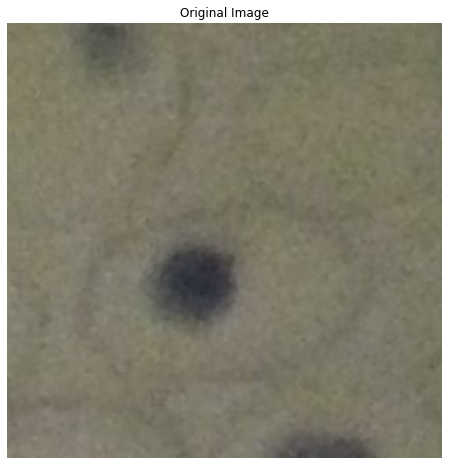

In [1]:
import ImagePreprocessing, ImageSegmentation
import matplotlib.pyplot as plt
import numpy as np
import imageio

src = "Data/Original/I1.jpg"

cellOriginal = imageio.imread(src, pilmode="RGB")

plt.figure(figsize = (8, 8))
plt.axis("off")
plt.title("Original Image")
plt.imshow(cellOriginal);

We convert to grayscale using luminance method.

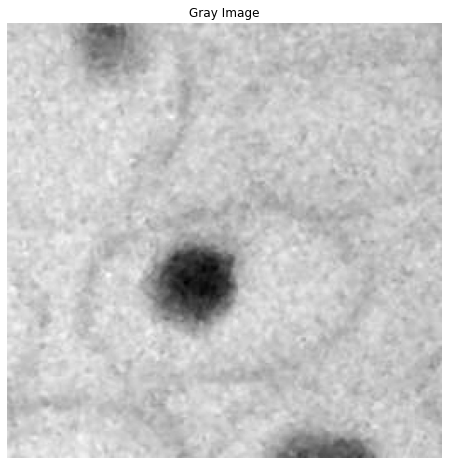

In [2]:
cellGray = ImagePreprocessing.convertLuminance(cellOriginal)

plt.figure(figsize = (8, 8))
plt.axis("off")
plt.title("Gray Image")
plt.imshow(cellGray, cmap = "gray");

We will apply histogram equalization for the image. The idea is to better distribute the image intensities. For example, we have before applying equalization the following distribution.

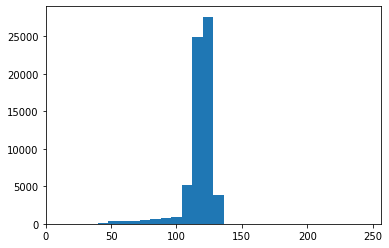

In [3]:
fig, ax = plt.subplots(1, 1)
ax.hist(cellGray.ravel(), bins = 32, range=[0, 256])
ax.set_xlim(0, 256);

Applying histogram equalization we have the following image.

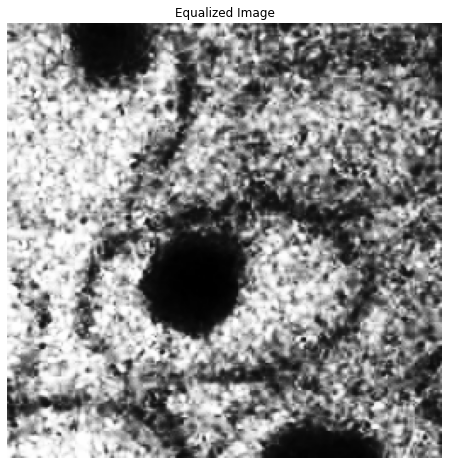

In [4]:
cellEq = ImagePreprocessing.histogramEqualization(cellGray)

plt.figure(figsize = (8, 8))
plt.axis("off")
plt.title("Equalized Image")
plt.imshow(cellEq, cmap = "gray");

Having the following intensity distribution. A much better distributed intensity per se.

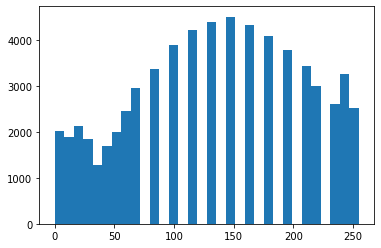

In [5]:
fig, ax = plt.subplots(1, 1)
ax.hist(cellEq.ravel(), bins = 32);

Now we apply a Gaussian Filter. This filter will help with segmentation processing, consering how the filter can smooth the image, reducing the noise around the nuclei.

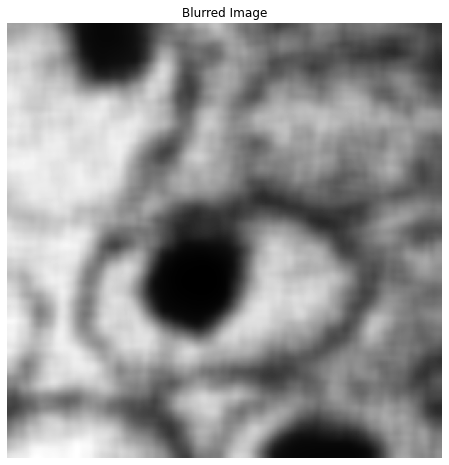

In [6]:
cellGaussian = ImagePreprocessing.gaussianFilter(cellEq, k = 15, sigma = 10)

plt.figure(figsize = (8, 8))
plt.axis("off")
plt.title("Blurred Image")
plt.imshow(cellGaussian, cmap = "gray");

## Image Segmentation

After pre-processing the image we can work with Region-Based and Clustering Segmentation methods.

### Region-Based Segmentation

In the Region-Based route, we will work with a threshold value for dealing with intensities in the image.

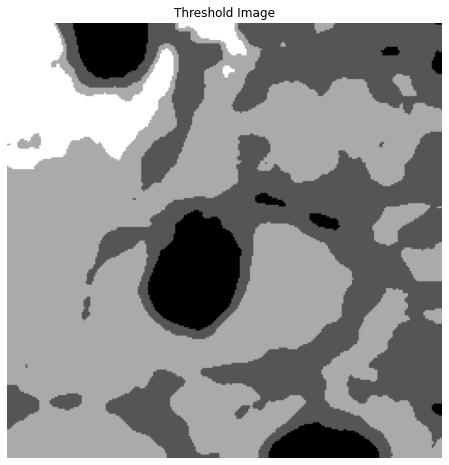

In [7]:
cellThresh = ImageSegmentation.thresholdRegion(cellGaussian)

plt.figure(figsize = (8, 8))
plt.axis("off")
plt.title("Threshold Image")
plt.imshow(cellThresh, cmap = "gray");

Our Regions Of Interest (ROI) are only the darkest regions, which probably contains our nuclei, so we will isolate the ROI in a binary image.

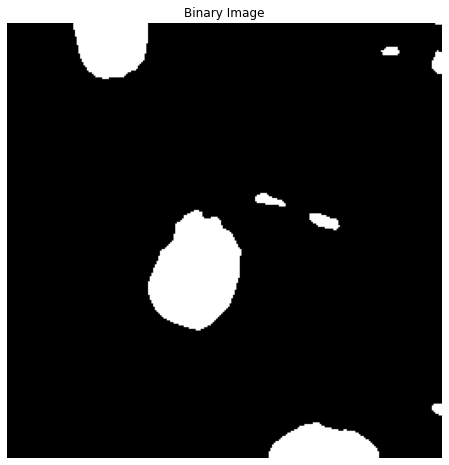

In [10]:
mask = np.ones(cellThresh.shape)
mask[np.where(cellThresh == 0)] = 0
mask = ~(mask.astype(np.uint8))

mask = ImagePreprocessing.scalingImage(mask, 0, 1)

plt.figure(figsize = (8, 8))
plt.axis("off")
plt.title("Binary Image")
plt.imshow(mask, cmap = "gray");